/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


       Delivery No  Heart Problem  ...  Blood of Pressure  Caesarian
count    80.000000      80.000000  ...          80.000000  80.000000
mean      1.362500       0.375000  ...           1.000000   0.575000
std       0.815107       0.487177  ...           0.711568   0.497462
min       0.000000       0.000000  ...           0.000000   0.000000
25%       1.000000       0.000000  ...           0.750000   0.000000
50%       2.000000       0.000000  ...           1.000000   1.000000
75%       2.000000       1.000000  ...           1.250000   1.000000
max       2.000000       1.000000  ...           2.000000   1.000000

[8 rows x 6 columns]


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seab

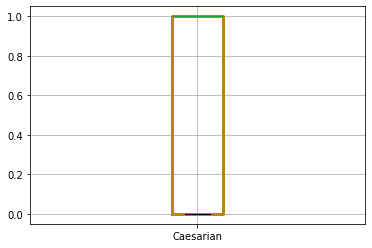

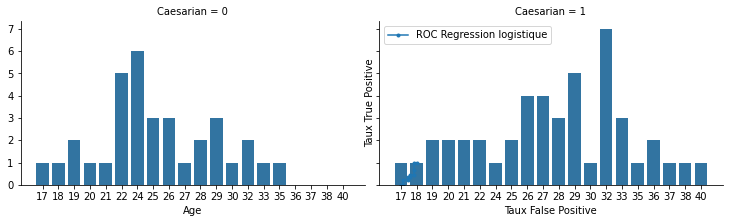

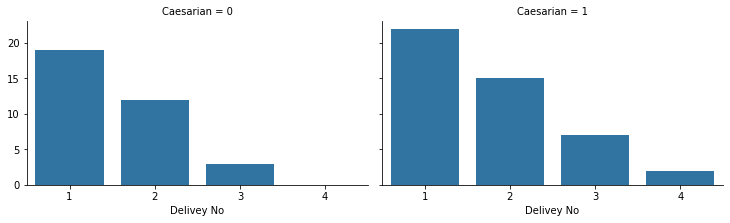

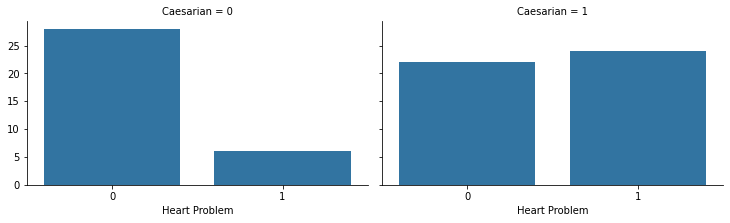

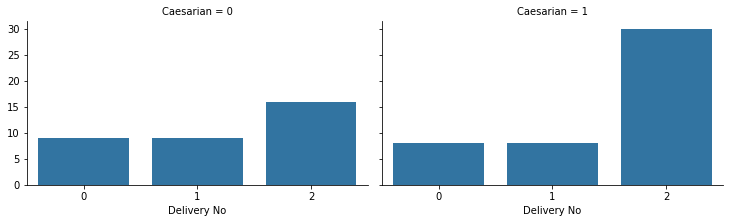

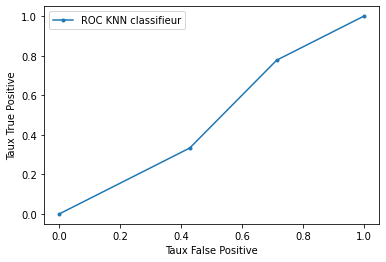

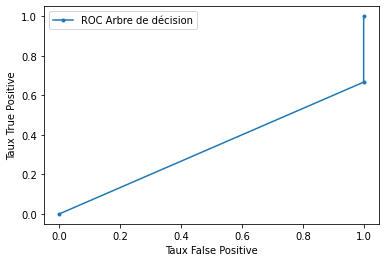

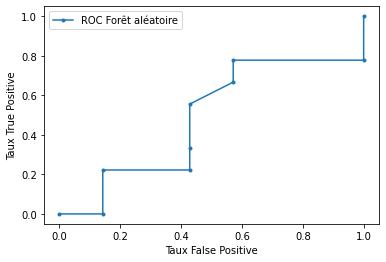

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


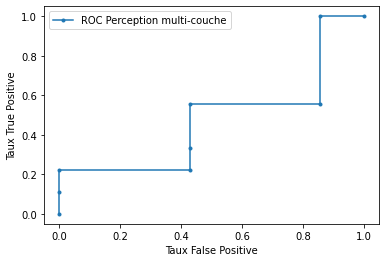

In [ ]:
#introduction:
#La césarienne est une intervention chirurgicale qui permet de faire accoucher une femme en pratiquant une incision dans l’abdomen et l’utérus. C’est une technique employée très fréquemment : selon les pays, en moyenne, de 15 à 30% des accouchements se font par césarienne. En France, par exemple, c'est environ 1 femme sur 5 qui donne naissance à son enfant par césarienne. Ces chiffres sont très importants et peuvent être expliqués : c'est pourquoi, dans ce projet, nous cherchons à prédire si une femme aura besoin ou non de faire une césarienne selon certaines caractéristiques. 

#De manière générale, les médecins optent pour la césarienne lorsque les conditions, chez la mère ou chez l’enfant, ne sont pas favorables à un accouchement par les voies naturelles. La césarienne peut être programmée ou pratiquée en urgence. Les indications ne sont pas les mêmes selon ces deux situations.

#Lorsque la césarienne est programmée à l’avance (elle est réalisée avant le déclenchement naturel du travail). Les raisons sont diverses :
#-présentation anormale de l'enfant
#-localisation anormale du placenta
#-grossesse multiple
#-enfant de poids très élevé
#-problèmes pendant la grossesse
#-antécédent de césarienne pour une précédente grossesse
#-infection de la mère par certains virus comme le VIH (la césarienne permet de ne pas contaminer le bébé) 

#La césarienne peut aussi être pratiquée en urgence, au cours de la grossesse ou lorsque l’accouchement ne se déroule pas comme prévu, et que le travail par voie basse devient impossible ou trop risqué pour la mère et/ou l’enfant :
#-anomalies du rythme cardiaque de l’enfant 
#-arrêt de la dilatation du col malgré les médicaments
#-hypoxie de la mère ou de l’enfant
#-échec d’une extraction par forceps
#-hémorragies maternelles
#-risque de lésions graves
#-crise de prééclampsie

#De plus, il faut savoir qu’après une première césarienne, il est souvent possible d’accoucher par voie basse lors des grossesses ultérieures.

#Dans notre étude, nous allons chercher à prédire la césarienne notamment grâce à la programmation avancée, c'est à dire les caractéristiques fixes de l'accouchement.


import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
import pickle
import codecs




# Importation de la base de données

data = pd.read_csv('/content/Caesarian Section Classification Dataset(CSV).csv')

# Nettoayge de la base data

#transformer la base en 2 bases categorique et numerique

cat_data=[]

num_data=[]

for i,c in enumerate(data.dtypes):
    
  if c==object:
      
    cat_data.append(data.iloc[:,i])
    
  else:
      
    num_data.append(data.iloc[:,i])
    
cat_data=pd.DataFrame(cat_data).transpose()

num_data=pd.DataFrame(num_data).transpose()

#modifier les valeurs de la colonne caesarian de type catégorique au type numérique

Caesarian1_value={'yes':1,'Yes':1,'No':0}

Caesarian1=cat_data['Caesarian']

cat_data.drop('Caesarian',axis=1, inplace=True)

Caesarian1=Caesarian1.map(Caesarian1_value)

#modifier les valeurs de la colonne pressureblood

PressBlood_value={'Low':0,'low':0,'High':2,'Normal':1}

PressBlood=cat_data['Blood of Pressure']

cat_data.drop('Blood of Pressure',axis=1, inplace=True)

PressBlood=PressBlood.map(PressBlood_value)


# Transformation des labels catégoriels en labels numériques


le=LabelEncoder()

for i in cat_data:
    
  cat_data[i] = le.fit_transform(cat_data[i])

data1=pd.concat([cat_data,num_data,PressBlood,Caesarian1],axis=1)


# Affichage de la table descriptive

    
Table_descriptive = data1.describe()


print(Table_descriptive)

boxprops = dict(linestyle='-', linewidth=3, color='darkgoldenrod')

plt.figure(0)

boxplot = data1.boxplot(column='Caesarian', boxprops=boxprops)

# A travers les boites de moustache des différentes variables on peut voir que les variables sont distribuées à peu près dans des intervalles de meme longueur, un point important aussi c'est que les variables Delivey No, Heart Problem et Caesarian sont asymétriques donc leurs données peuvent ne pas être normalement distribuées et concernant les valeurs abberantes notre graphe n'affiche pas des données de cette nature pour toutes les variables de traitement.

#effets des variables sur la variable Caesarian

#effet de la variable Age 

grid=sns.FacetGrid(data1,col='Caesarian',size=3.2,aspect=1.6)

grid.map(sns.countplot,'Age')

#l'operation est encouragée pour les femmes autour des trentaines et découragé pour celles autour des vingtaines
#l'age a un effet sur la variable caesarian

#effet de la varible Delivey No

grid=sns.FacetGrid(data1,col='Caesarian',size=3.2,aspect=1.6)

grid.map(sns.countplot,'Delivey No')

#on déduit que le nombre  d'opérations cesariennes est plus élevé chez les femmes ayant moins d'enfants et surtout lorsqu'il s'agit de leur premier enfant 
#mais aussi non necessité d'operation pour les femmes ayant moins d'enfants 
#conclusion: la variable nbrenfants n'a pas un effet majeur sur l'accord d'operation cesarienne

#effet de la variable Heart Problem

grid=sns.FacetGrid(data1,col='Caesarian',size=3.2,aspect=1.6)

grid.map(sns.countplot,'Heart Problem')

#pas d'effet majeur sur la decision d'operation cesarienne selon la variable HeartProblem
#mais les femmes n'ayant pas de probleme cardiovasculaire effectuent moins d'operations

#effet de la variable Delivery No	

grid=sns.FacetGrid(data1,col='Caesarian',size=3.2,aspect=1.6)

grid.map(sns.countplot,'Delivery No')

#plus les femmes auront une grossesse retardée plus elles effectuent une operation
#conclusion: la variable Deliveru No affecte la variable Caesarian

# Prédiction par regression



# Prédiction par KNN

from sklearn.neighbors import KNeighborsClassifier


y = data1["Caesarian"]

X = data1.copy()

X.drop(["Caesarian"], axis=1, inplace=True)

train_size = 0.8  # train -> 80 %, Test -> 20 %


# Division des données en base d'apprentissage et en base de test

N_train = int(train_size*len(y))
N_test = len(y) - N_train


X = X.to_numpy()
y = y.to_numpy()

X_train = X[0:N_train,:]
X_test = X[N_train:,:]


y_train = y[0:N_train]
y_test = y[N_train:]

from sklearn.neighbors import NearestNeighbors
NN = NearestNeighbors(n_neighbors=2)


NN.fit(X)

A = NN.kneighbors_graph(X)

# Instance d'un KNN
neigh = KNeighborsClassifier(n_neighbors=3)

# COnstruction du modèle KNN sur la base d'apprentissage
neigh.fit(X_train, y_train)

predictions = neigh.predict(X_test)

   

from sklearn.metrics import roc_curve





from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot


'''
------------------------------------------------------------------------------
                    Regression logistique
------------------------------------------------------------------------------
'''



# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.2, random_state=2)


# fit a model


model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)


# predict probabilities
yhat = model.predict_proba(testX)

# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]


plt.figure(1)

# calculate roc curve for model
fpr, tpr, _ = roc_curve(testy, pos_probs)
# plot model roc curve
pyplot.plot(fpr, tpr, marker='.', label='ROC Regression logistique')
# axis labels
pyplot.xlabel('Taux False Positive')
pyplot.ylabel('Taux True Positive')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()


'''
------------------------------------------------------------------------------
                    KNN classifieur
------------------------------------------------------------------------------
'''


model = KNeighborsClassifier(n_neighbors=3)
model.fit(trainX, trainy)


# predict probabilities
yhat = model.predict_proba(testX)

# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]


plt.figure(1)

# calculate roc curve for model
fpr, tpr, _ = roc_curve(testy, pos_probs)
# plot model roc curve
pyplot.plot(fpr, tpr, marker='.', label='ROC KNN classifieur')
# axis labels
pyplot.xlabel('Taux False Positive')
pyplot.ylabel('Taux True Positive')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()



'''
------------------------------------------------------------------------------
                    Arbre de décision
------------------------------------------------------------------------------
'''



from sklearn.tree import DecisionTreeClassifier
 
 
model = DecisionTreeClassifier(random_state=0)



model.fit(trainX, trainy)


# predict probabilities
yhat = model.predict_proba(testX)

# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]


plt.figure(1)

# calculate roc curve for model
fpr, tpr, _ = roc_curve(testy, pos_probs)
# plot model roc curve
pyplot.plot(fpr, tpr, marker='.', label='ROC Arbre de décision')
# axis labels
pyplot.xlabel('Taux False Positive')
pyplot.ylabel('Taux True Positive')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()




'''
------------------------------------------------------------------------------
                    Foret aléatoire
------------------------------------------------------------------------------
'''

from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(max_depth=2, random_state=0)


model.fit(trainX, trainy)


# predict probabilities
yhat = model.predict_proba(testX)

# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]


plt.figure(1)

# calculate roc curve for model
fpr, tpr, _ = roc_curve(testy, pos_probs)
# plot model roc curve
pyplot.plot(fpr, tpr, marker='.', label='ROC Forêt aléatoire')
# axis labels
pyplot.xlabel('Taux False Positive')
pyplot.ylabel('Taux True Positive')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()


'''
------------------------------------------------------------------------------
                  Perception multi-couche
------------------------------------------------------------------------------
'''




from sklearn.neural_network import MLPClassifier


model = MLPClassifier(random_state=1, max_iter=300)


model.fit(trainX, trainy)


# predict probabilities
yhat = model.predict_proba(testX)

# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]


plt.figure(1)

# calculate roc curve for model
fpr, tpr, _ = roc_curve(testy, pos_probs)
# plot model roc curve
pyplot.plot(fpr, tpr, marker='.', label='ROC Perception multi-couche')
# axis labels
pyplot.xlabel('Taux False Positive')
pyplot.ylabel('Taux True Positive')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
#appliquer le modele du DecisionTree sur notre base de données
model= KNeighborsClassifier(n_neighbors=3)
model.fit(data1,Caesarian1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
#enregistrer notre modele pour le deploiment dans l'application
pickle.dump(model,open('model.pkl','wb'))